In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

<br>

In [44]:
bio = pd.read_csv("./tables/table_bio.csv")
cadId_men = sorted(set(bio[(bio.cadSexo=="M")&(bio.source_leg<13)].cadId))
cadId_women = sorted(set(bio[(bio.cadSexo=="F")&(bio.source_leg<13)].cadId))

In [97]:
situation_codes = pd.read_csv("./situation_codes.csv", index_col="code")
situation = pd.read_csv("./tables/table_situations.csv")
situation.columns = situation.columns.astype(np.int64)
situation.index = pd.date_range("1980-11-03", "2015-10-23")
situation_summary = pd.DataFrame(index = pd.date_range("1980-11-03", "2015-10-23"), 
                                 columns=np.array(range(1,12)).astype(np.float))
for i in situation_summary.columns:
    situation_summary[i] = situation[situation == i].count(axis=1)

****

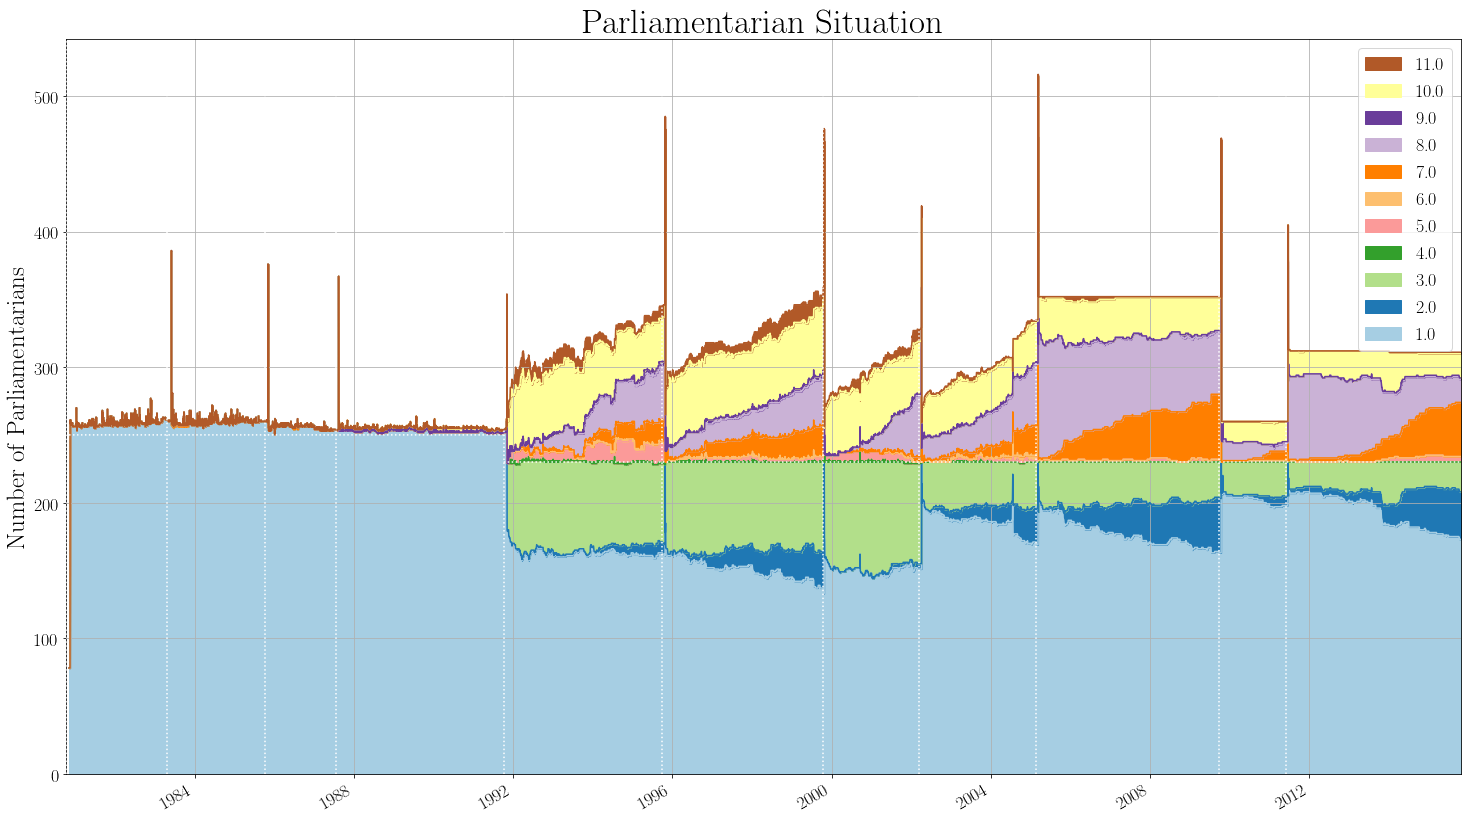

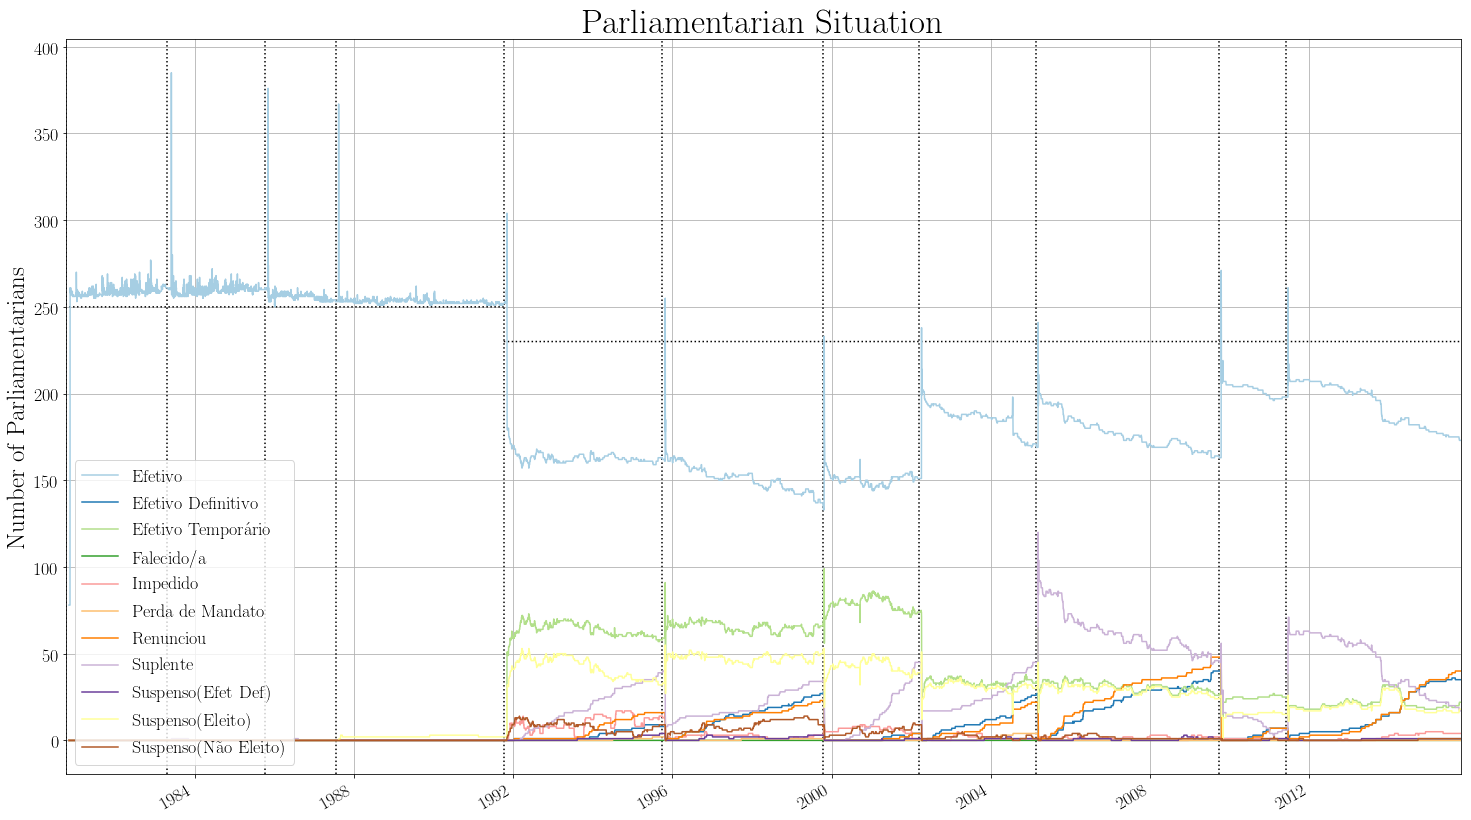

In [98]:
f, ax = plt.subplots(figsize=(25,15))
#situation_summary.columns = situation_codes.situation.values
ax.plot(pd.date_range("1980-11-03", "1991-10-05"), np.ones(len(pd.date_range("1980-11-03", "1991-10-05")))*250, 'w:', zorder=12)#, linewidth=5)
ax.plot(pd.date_range("1991-10-06", "2015-10-23"), np.ones(len(pd.date_range("1991-10-06", "2015-10-23")))*230, 'w:', zorder=11)#, linewidth=5)
leg_dates = ["1980-10-05", "1983-04-25", "1985-10-06", "1987-07-19", "1991-10-06", "1995-10-01", "1999-10-10", "2002-03-17", "2005-02-20", "2009-09-27", "2011-06-05"]
for i in leg_dates: ax.axvline(x=pd.to_datetime(i), color='w', linestyle=":", zorder=10)
situation_summary.plot.area(ax = ax, cmap='Paired')
ax.set_title("Parliamentarian Situation", size=35)
ax.set_ylabel('Number of Parliamentarians', fontsize=25)
handles,labels = [reversed(i) for i in ax.get_legend_handles_labels()]
ax.legend(handles,labels)
ax.grid()
plt.show()

f, ax = plt.subplots(figsize=(25,15))
situation_summary.columns = situation_codes.situation.values
ax.plot(pd.date_range("1980-11-03", "1991-10-05"), np.ones(len(pd.date_range("1980-11-03", "1991-10-05")))*250, 'k:')#, zorder=12)#, linewidth=5)
ax.plot(pd.date_range("1991-10-06", "2015-10-23"), np.ones(len(pd.date_range("1991-10-06", "2015-10-23")))*230, 'k:')#, zorder=11)#, linewidth=5)
leg_dates = ["1980-10-05", "1983-04-25", "1985-10-06", "1987-07-19", "1991-10-06", "1995-10-01", "1999-10-10", "2002-03-17", "2005-02-20", "2009-09-27", "2011-06-05"]
for i in leg_dates: ax.axvline(x=pd.to_datetime(i), color='k', linestyle=":")#, zorder=10)
situation_summary.plot(ax = ax, cmap='Paired')
ax.set_title("Parliamentarian Situation", size=35)
ax.set_ylabel('Number of Parliamentarians', fontsize=25)
handles,labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc=3)
ax.grid()
plt.show()

****

In [4]:
temp__ = pd.DataFrame(index=pd.date_range("1980-11-03", "2016-01-01"), columns=situation.columns).astype(np.float64)
temp__.index.name = "date"
activities_actP, activities_ini, activities_intev, activities_req =[temp__.copy() for i in range(4)]

activities = pd.read_csv("./tables/table_clean.csv")
activities = activities[activities.source_leg<=12]
activities['date'] = pd.to_datetime(activities.date)
types_cols = [i for i in activities.columns if i[:6]=="types_"]
activities.loc[:,types_cols]=activities.loc[:,types_cols].astype(np.float)

for cad in sorted(set(activities.cadId)):
    activities_cad = activities.loc[activities.cadId==cad,types_cols+["date"]].groupby("date").sum().copy()
    cad_index = activities_cad.index
    activities_actP.loc[cad_index, cad] = activities_cad.loc[:,"types_actP"]
    activities_ini.loc[cad_index,cad] = activities_cad.loc[:,"types_ini"]
    activities_intev.loc[cad_index,cad] = activities_cad.loc[:,"types_intev"]
    activities_req.loc[cad_index,cad] = activities_cad.loc[:,"types_req"]

In [115]:
situation_active = (((situation.iloc[:,:] == 1) | (situation.iloc[:,:] == 2)) | (situation.iloc[:,:] == 3)).copy().astype(float)

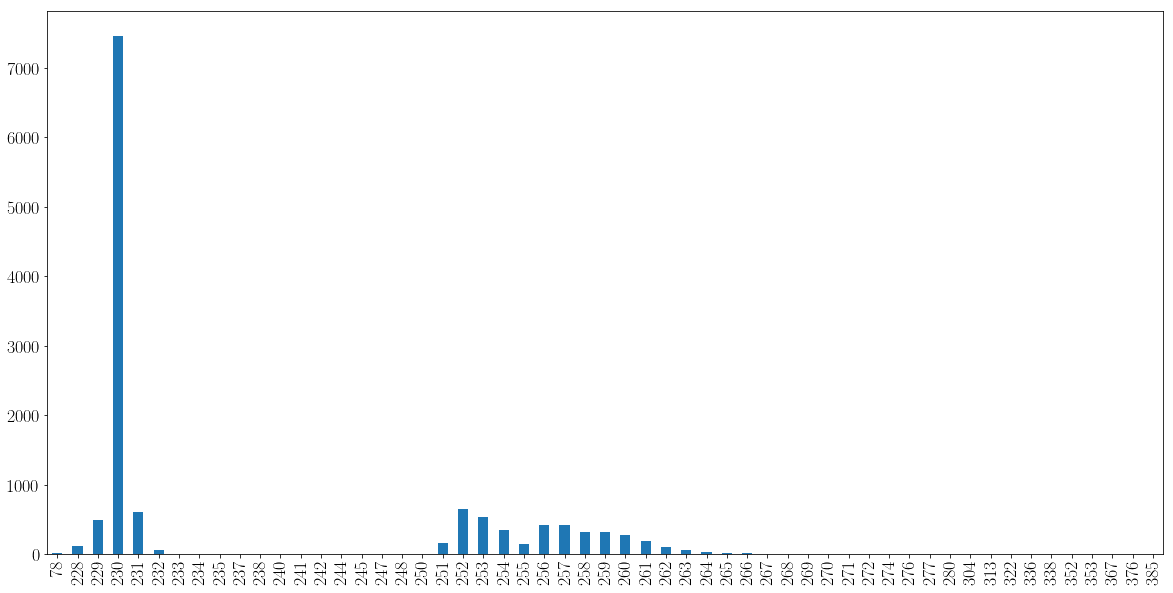

In [13]:
situation_active.sum(axis=1).value_counts().sort_index().plot.bar(figsize=(20,10))

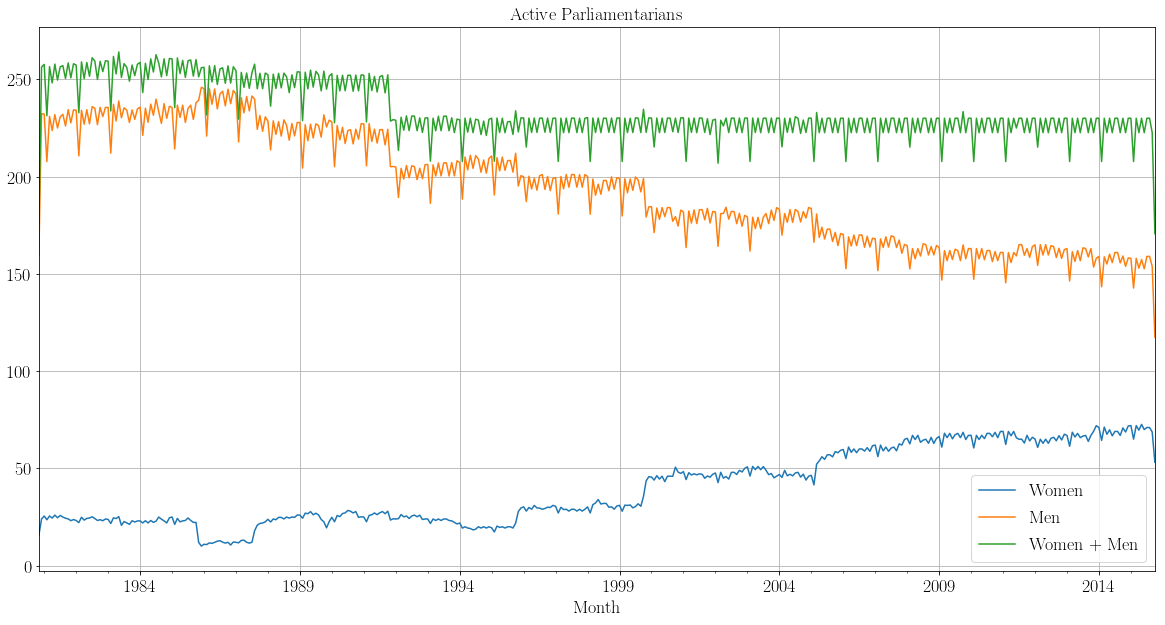

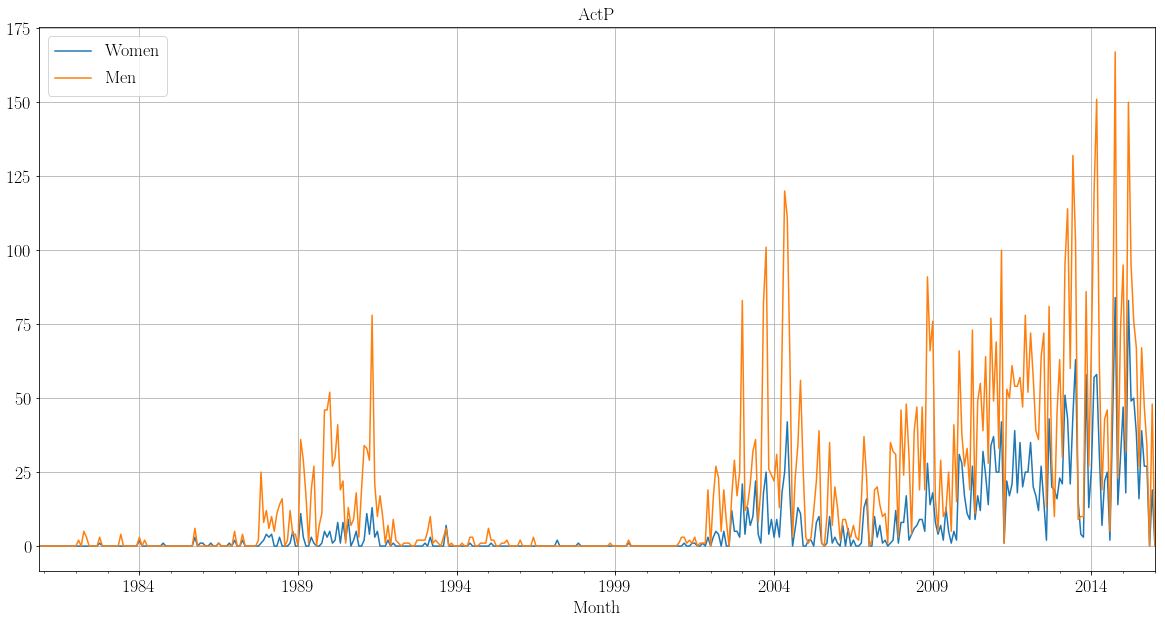

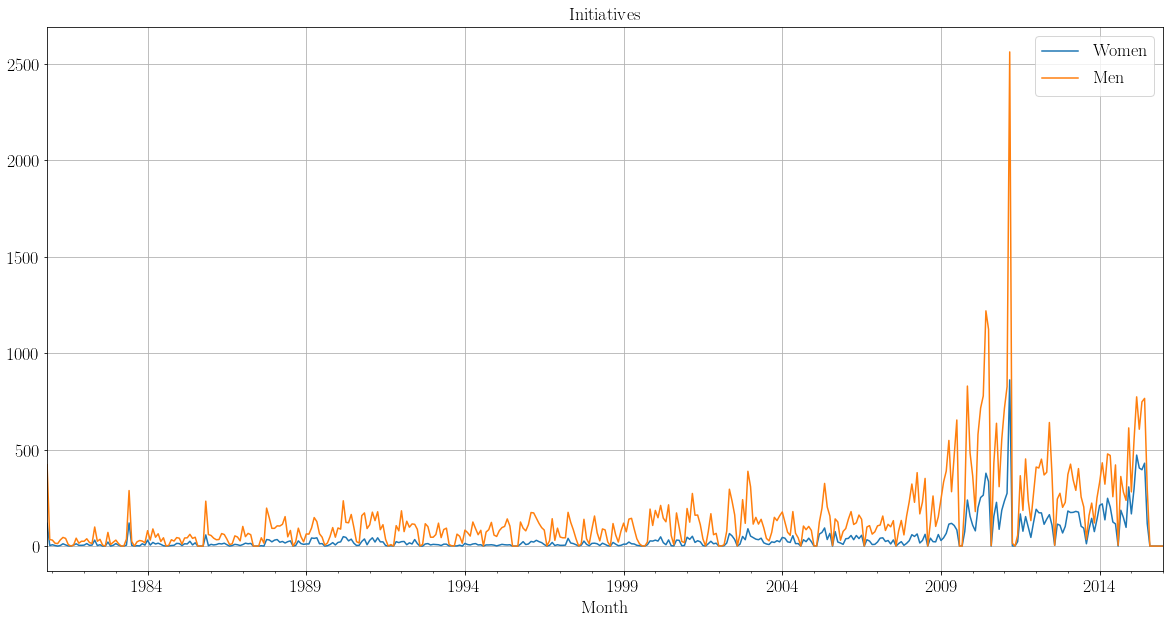

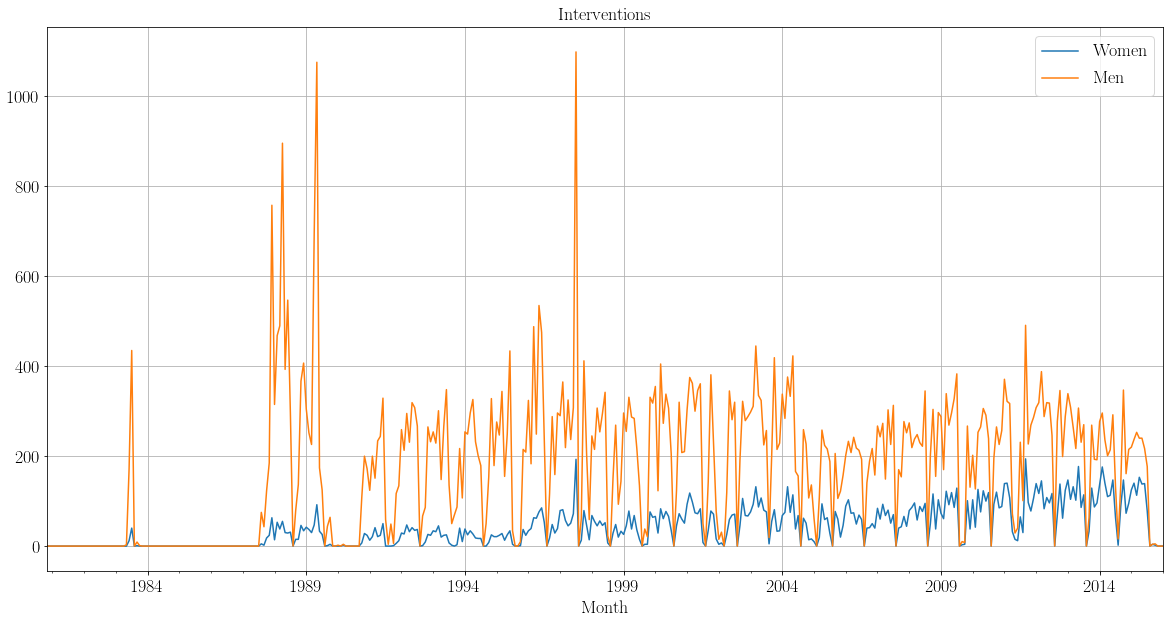

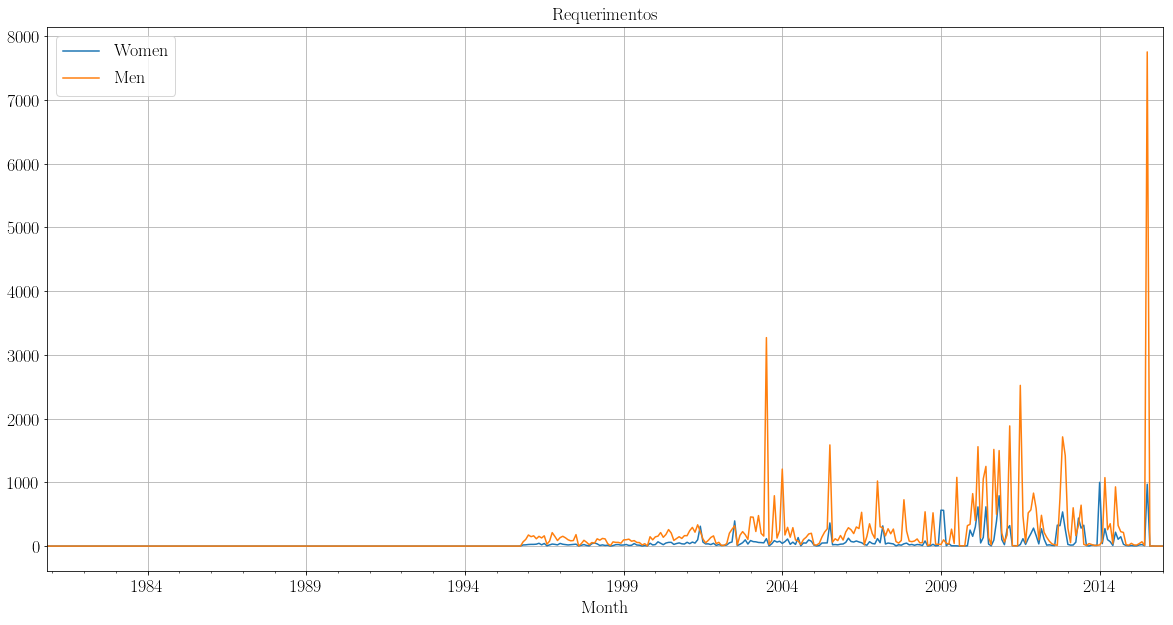

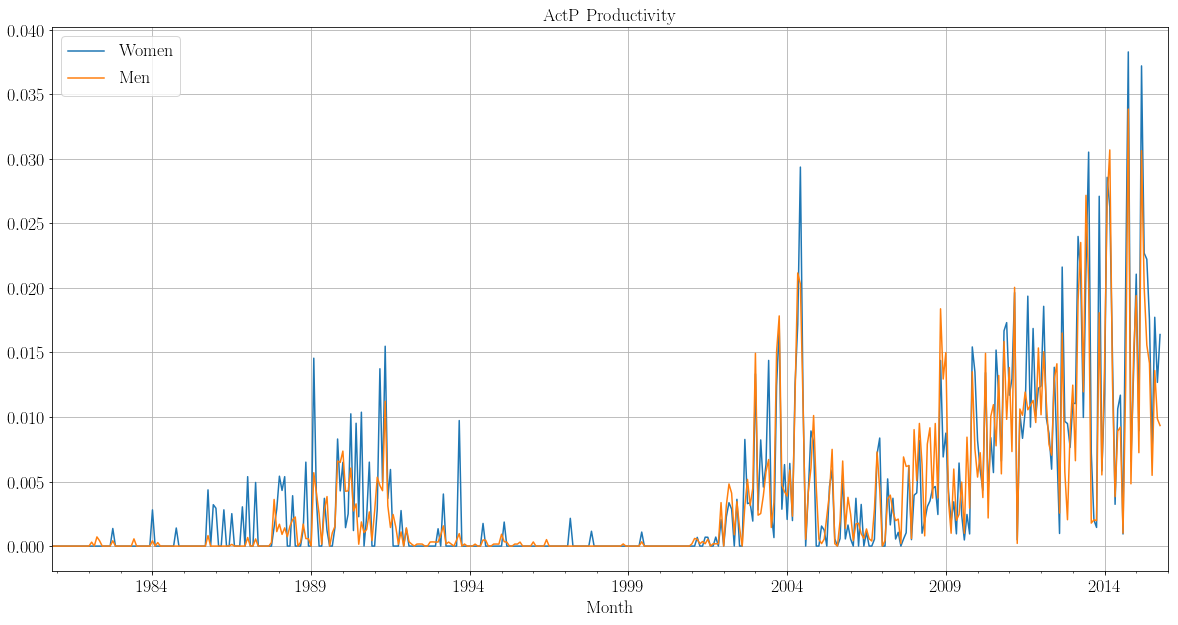

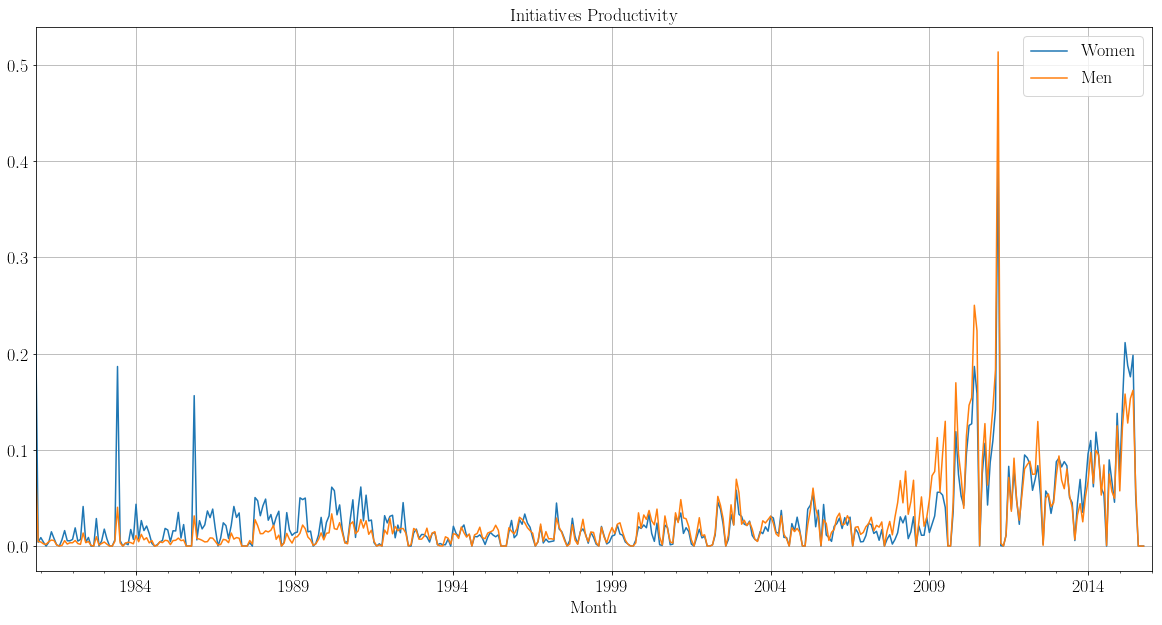

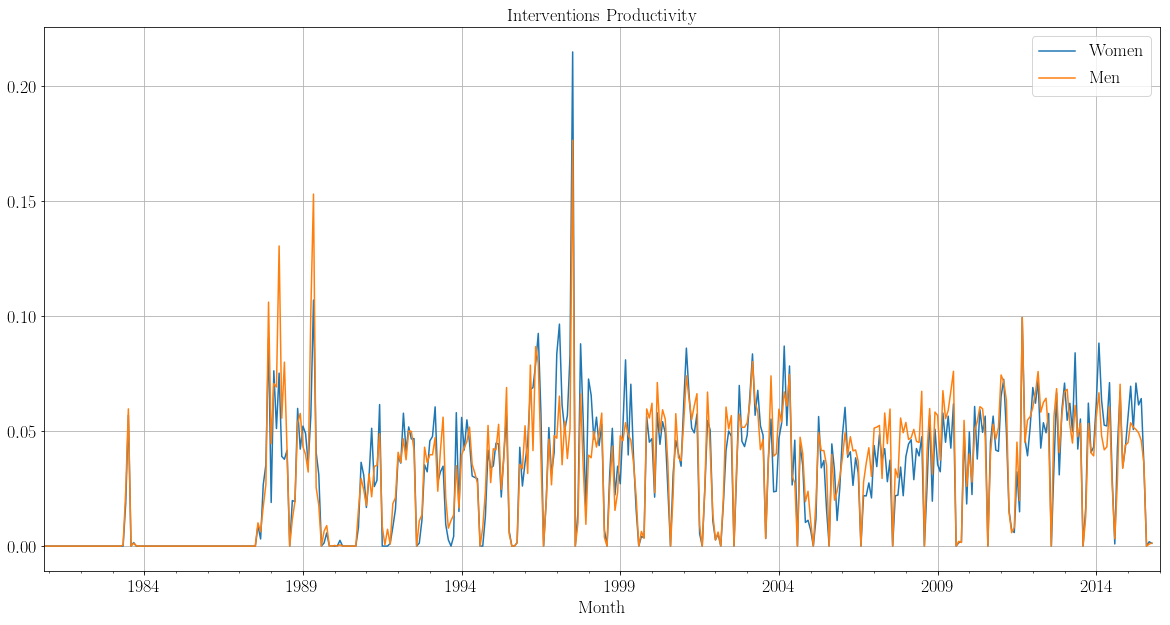

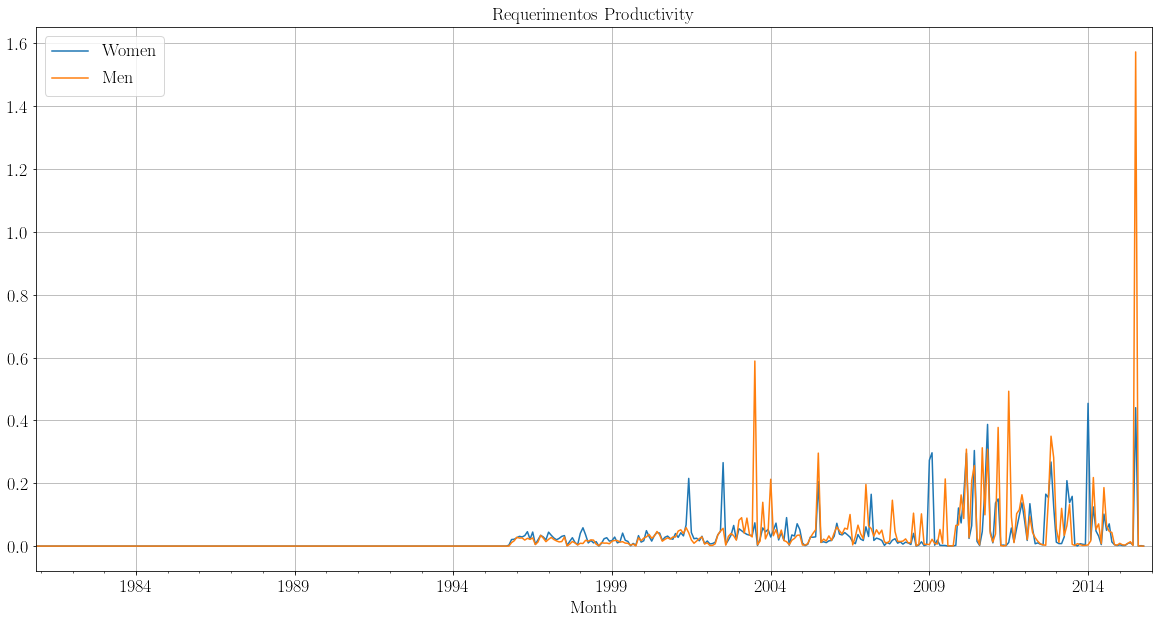

In [116]:
cadId_men_ok = [i for i in cadId_men if i in situation.columns]


f, ax = plt.subplots(figsize=(20,10))
(situation_active.groupby(pd.Grouper(freq='M')).sum()[cadId_women].sum(axis=1)/31).plot(ax=ax, label="Women")
(situation_active.groupby(pd.Grouper(freq='M')).sum()[cadId_men_ok].sum(axis=1)/31).plot(ax=ax, label="Men")
(situation_active.groupby(pd.Grouper(freq='M')).sum().sum(axis=1)/31).plot(ax=ax, label="Women + Men")
ax.set_title("Active Parliamentarians")
ax.set_xlabel("Month")
plt.grid(), plt.legend(), plt.show()
print("\n")

#####

f, ax = plt.subplots(figsize=(20,10))
activities_actP.groupby(pd.Grouper(freq='M')).sum()[cadId_women].sum(axis=1).plot(ax=ax, label="Women")
activities_actP.groupby(pd.Grouper(freq='M')).sum()[cadId_men_ok].sum(axis=1).plot(ax=ax, label="Men")
ax.set_title("ActP")
ax.set_xlabel("Month")
plt.grid(), plt.legend(), plt.show()
print("\n")

f, ax = plt.subplots(figsize=(20,10))
activities_ini.groupby(pd.Grouper(freq='M')).sum()[cadId_women].sum(axis=1).plot(ax=ax, label="Women")
activities_ini.groupby(pd.Grouper(freq='M')).sum()[cadId_men_ok].sum(axis=1).plot(ax=ax, label="Men")
ax.set_title("Initiatives")
ax.set_xlabel("Month")
plt.grid(), plt.legend(), plt.show()
print("\n")

f, ax = plt.subplots(figsize=(20,10))
activities_intev.groupby(pd.Grouper(freq='M')).sum()[cadId_women].sum(axis=1).plot(ax=ax, label="Women")
activities_intev.groupby(pd.Grouper(freq='M')).sum()[cadId_men_ok].sum(axis=1).plot(ax=ax, label="Men")
ax.set_title("Interventions")
ax.set_xlabel("Month")
plt.grid(), plt.legend(), plt.show()
print("\n")

f, ax = plt.subplots(figsize=(20,10))
activities_req.groupby(pd.Grouper(freq='M')).sum()[cadId_women].sum(axis=1).plot(ax=ax, label="Women")
activities_req.groupby(pd.Grouper(freq='M')).sum()[cadId_men_ok].sum(axis=1).plot(ax=ax, label="Men")
ax.set_title("Requerimentos")
ax.set_xlabel("Month")
plt.grid(), plt.legend(), plt.show()
print("\n")


#####

f, ax = plt.subplots(figsize=(20,10))
(activities_actP.groupby(pd.Grouper(freq='M')).sum()[cadId_women].sum(axis=1)/situation_active.groupby(pd.Grouper(freq='M')).sum()[cadId_women].sum(axis=1)).plot(ax=ax, label="Women")
(activities_actP.groupby(pd.Grouper(freq='M')).sum()[cadId_men_ok].sum(axis=1)/situation_active.groupby(pd.Grouper(freq='M')).sum()[cadId_men_ok].sum(axis=1)).plot(ax=ax, label="Men")
ax.set_title("ActP Productivity")
ax.set_xlabel("Month")
plt.grid(), plt.legend(), plt.show()

f, ax = plt.subplots(figsize=(20,10))
(activities_ini.groupby(pd.Grouper(freq='M')).sum()[cadId_women].sum(axis=1)/situation_active.groupby(pd.Grouper(freq='M')).sum()[cadId_women].sum(axis=1)).plot(ax=ax, label="Women")
(activities_ini.groupby(pd.Grouper(freq='M')).sum()[cadId_men_ok].sum(axis=1)/situation_active.groupby(pd.Grouper(freq='M')).sum()[cadId_men_ok].sum(axis=1)).plot(ax=ax, label="Men")
ax.set_title("Initiatives Productivity")
ax.set_xlabel("Month")
plt.grid(), plt.legend(), plt.show()

f, ax = plt.subplots(figsize=(20,10))
(activities_intev.groupby(pd.Grouper(freq='M')).sum()[cadId_women].sum(axis=1)/situation_active.groupby(pd.Grouper(freq='M')).sum()[cadId_women].sum(axis=1)).plot(ax=ax, label="Women")
(activities_intev.groupby(pd.Grouper(freq='M')).sum()[cadId_men_ok].sum(axis=1)/situation_active.groupby(pd.Grouper(freq='M')).sum()[cadId_men_ok].sum(axis=1)).plot(ax=ax, label="Men")
ax.set_title("Interventions Productivity")
ax.set_xlabel("Month")
plt.grid(), plt.legend(), plt.show()

f, ax = plt.subplots(figsize=(20,10))
(activities_req.groupby(pd.Grouper(freq='M')).sum()[cadId_women].sum(axis=1)/situation_active.groupby(pd.Grouper(freq='M')).sum()[cadId_women].sum(axis=1)).plot(ax=ax, label="Women")
(activities_req.groupby(pd.Grouper(freq='M')).sum()[cadId_men_ok].sum(axis=1)/situation_active.groupby(pd.Grouper(freq='M')).sum()[cadId_men_ok].sum(axis=1)).plot(ax=ax, label="Men")
ax.set_title("Requerimentos Productivity")
ax.set_xlabel("Month")
plt.grid(), plt.legend(), plt.show();

****

### Summary Active & Activities

In [203]:
leg_dates = pd.read_csv("./tables/table_leg_dates.csv")

In [204]:
leg_dates.iloc[:-1,:]

source_leg legDes       dtini       dtfim
0            2     II  1980-11-13  1983-05-30
1            3    III  1983-05-31  1985-11-03
2            4     IV  1985-11-04  1987-08-12
3            5      V  1987-08-13  1991-11-03
4            6     VI  1991-11-04  1995-10-26
5            7    VII  1995-10-27  1999-10-24
6            8   VIII  1999-10-25  2002-04-04
7            9     IX  2002-04-05  2005-03-09
8           10      X  2005-03-10  2009-10-14
9           11     XI  2009-10-15  2011-06-19
10          12    XII  2011-06-20  2015-10-22

In [267]:
activities_ = pd.DataFrame(index=summary_active.index, columns=['types_actP','types_ini','types_intev',"types_req"])

for i, df in enumerate([activities_actP, activities_ini, activities_intev, activities_req]):
    df_ = df.copy()
    df_["source_leg"] = False
    for index, row in leg_dates.iloc[:-1,:].iterrows():
        df_.loc[pd.date_range(row.dtini, row.dtfim),"source_leg"] = row.source_leg
    df_ = df_[df_.source_leg != False]
    df_["F"] = df_[cadId_women].sum(axis=1)
    df_["M"] = df_[cadId_men_ok].sum(axis=1)
    df_cadSexo = df_.groupby("source_leg").sum()[["F","M"]].reset_index()
    df_F = pd.DataFrame()
    df_F["source_leg"] = df_cadSexo.source_leg.copy()
    df_F["sum"] = df_cadSexo['F'].copy()
    df_F["cadSexo"] = "F"
    df_M = pd.DataFrame()
    df_M["source_leg"] = df_cadSexo.source_leg.copy()
    df_M["sum"] = df_cadSexo['M'].copy()
    df_M["cadSexo"] = "M"
    summary_i = df_F.append(df_M).groupby(["source_leg", "cadSexo"]).sum()
    
    activities_.iloc[:,i] = summary_i["sum"]
summary_activities = activities_.copy()

In [268]:
summary_activities

types_actP  types_ini  types_intev  types_req
source_leg cadSexo                                               
2          F               1.0      289.0          0.0        0.0
           M              13.0     1128.0          0.0        0.0
3          F               6.0      350.0         53.0        0.0
           M              15.0     1209.0        619.0        0.0
4          F               9.0      200.0          0.0        0.0
           M              10.0     1040.0          0.0        0.0
5          F             131.0      997.0       1016.0        0.0
           M             864.0     4411.0      10424.0        0.0
6          F              16.0      381.0        947.0        0.0
           M              83.0     3317.0       9191.0        0.0
7          F               4.0      515.0       2109.0      989.0
           M               8.0     3670.0      11554.0     4301.0
8          F              15.0      561.0       1545.0     1448.0
           M              79.0     3156.0       6506.0     4332.0
9          F             321.0     1011.0       2094.0     2275.0
           M            1172.0     4165.0       8292.0    11008.0
10         F             303.0     2108.0       3423.0     3535.0
           M            1170.0     9342.0      11244.0    12555.0
11         F             432.0     4110.0       1651.0     4163.0
           M             929.0    12559.0       4143.0    11884.0
12         F            1562.0     7961.0       5172.0     7108.0
           M            3191.0    16971.0      11714.0    24201.0

<br>

In [274]:
situation_active_leg = situation_active.copy()
situation_active_leg["source_leg"] = False
for index, row in leg_dates.iloc[:-1,:].iterrows():
    situation_active_leg.loc[pd.date_range(row.dtini, row.dtfim),"source_leg"] = row.source_leg
situation_active_leg = situation_active_leg[situation_active_leg.source_leg != False]
situation_active_leg["F"] = situation_active_leg[cadId_women].sum(axis=1)
situation_active_leg["M"] = situation_active_leg[cadId_men_ok].sum(axis=1)
situation_active_leg_cadSexo = situation_active_leg.groupby("source_leg").sum()[["F","M"]].reset_index()
situation_active_leg_F = pd.DataFrame()
situation_active_leg_F["source_leg"] = situation_active_leg_cadSexo.source_leg.copy()
situation_active_leg_F["days"] = situation_active_leg_cadSexo['F'].copy()
situation_active_leg_F["cadSexo"] = "F"
situation_active_leg_M = pd.DataFrame()
situation_active_leg_M["source_leg"] = situation_active_leg_cadSexo.source_leg.copy()
situation_active_leg_M["days"] = situation_active_leg_cadSexo['M'].copy()
situation_active_leg_M["cadSexo"] = "M"
summary_active = situation_active_leg_F.append(situation_active_leg_M).groupby(["source_leg", "cadSexo"]).sum()


In [275]:
summary_active

days
source_leg cadSexo          
2          F         22860.0
           M        217415.0
3          F         20674.0
           M        209986.0
4          F          7776.0
           M        157597.0
5          F         39422.0
           M        350860.0
6          F         32565.0
           M        301713.0
7          F         44501.0
           M        291347.0
8          F         42058.0
           M        163407.0
9          F         51523.0
           M        194730.0
10         F        105196.0
           M        281296.0
11         F         41707.0
           M         99389.0
12         F        108572.0
           M        256282.0

### Add subtotals

In [270]:
def subtotals(df_in):
    
    df_in = pd.concat((df_in.reset_index(),
                 df_in.reset_index().groupby('source_leg').aggregate('sum').reset_index()), sort=True).\
                      sort_values(['source_leg','cadSexo']).\
                      fillna('Total').\
                      set_index(['source_leg','cadSexo'])
    return(df_in)

In [277]:
summary_activities_totals = summary_activities.copy()
summary_activities_totals["types_total"] = summary_activities_totals.sum(axis=1)
subtotals(summary_activities_totals)

types_actP  types_ini  types_intev  types_req  types_total
source_leg cadSexo                                                            
2          F               1.0      289.0          0.0        0.0        290.0
           M              13.0     1128.0          0.0        0.0       1141.0
           Total          14.0     1417.0          0.0        0.0       1431.0
3          F               6.0      350.0         53.0        0.0        409.0
           M              15.0     1209.0        619.0        0.0       1843.0
           Total          21.0     1559.0        672.0        0.0       2252.0
4          F               9.0      200.0          0.0        0.0        209.0
           M              10.0     1040.0          0.0        0.0       1050.0
           Total          19.0     1240.0          0.0        0.0       1259.0
5          F             131.0      997.0       1016.0        0.0       2144.0
           M             864.0     4411.0      10424.0        0.0      15699.0
           Total         995.0     5408.0      11440.0        0.0      17843.0
6          F              16.0      381.0        947.0        0.0       1344.0
           M              83.0     3317.0       9191.0        0.0      12591.0
           Total          99.0     3698.0      10138.0        0.0      13935.0
7          F               4.0      515.0       2109.0      989.0       3617.0
           M               8.0     3670.0      11554.0     4301.0      19533.0
           Total          12.0     4185.0      13663.0     5290.0      23150.0
8          F              15.0      561.0       1545.0     1448.0       3569.0
           M              79.0     3156.0       6506.0     4332.0      14073.0
           Total          94.0     3717.0       8051.0     5780.0      17642.0
9          F             321.0     1011.0       2094.0     2275.0       5701.0
           M            1172.0     4165.0       8292.0    11008.0      24637.0
           Total        1493.0     5176.0      10386.0    13283.0      30338.0
10         F             303.0     2108.0       3423.0     3535.0       9369.0
           M            1170.0     9342.0      11244.0    12555.0      34311.0
           Total        1473.0    11450.0      14667.0    16090.0      43680.0
11         F             432.0     4110.0       1651.0     4163.0      10356.0
           M             929.0    12559.0       4143.0    11884.0      29515.0
           Total        1361.0    16669.0       5794.0    16047.0      39871.0
12         F            1562.0     7961.0       5172.0     7108.0      21803.0
           M            3191.0    16971.0      11714.0    24201.0      56077.0
           Total        4753.0    24932.0      16886.0    31309.0      77880.0

In [280]:
summary_active_totals = summary_activities_totals.copy()
for col in summary_activities_totals.columns:
    summary_active_totals.loc[:,col]=summary_active.days

In [281]:
subtotals(summary_active_totals)

types_actP  types_ini  types_intev  types_req  types_total
source_leg cadSexo                                                            
2          F           22860.0    22860.0      22860.0    22860.0      22860.0
           M          217415.0   217415.0     217415.0   217415.0     217415.0
           Total      240275.0   240275.0     240275.0   240275.0     240275.0
3          F           20674.0    20674.0      20674.0    20674.0      20674.0
           M          209986.0   209986.0     209986.0   209986.0     209986.0
           Total      230660.0   230660.0     230660.0   230660.0     230660.0
4          F            7776.0     7776.0       7776.0     7776.0       7776.0
           M          157597.0   157597.0     157597.0   157597.0     157597.0
           Total      165373.0   165373.0     165373.0   165373.0     165373.0
5          F           39422.0    39422.0      39422.0    39422.0      39422.0
           M          350860.0   350860.0     350860.0   350860.0     350860.0
           Total      390282.0   390282.0     390282.0   390282.0     390282.0
6          F           32565.0    32565.0      32565.0    32565.0      32565.0
           M          301713.0   301713.0     301713.0   301713.0     301713.0
           Total      334278.0   334278.0     334278.0   334278.0     334278.0
7          F           44501.0    44501.0      44501.0    44501.0      44501.0
           M          291347.0   291347.0     291347.0   291347.0     291347.0
           Total      335848.0   335848.0     335848.0   335848.0     335848.0
8          F           42058.0    42058.0      42058.0    42058.0      42058.0
           M          163407.0   163407.0     163407.0   163407.0     163407.0
           Total      205465.0   205465.0     205465.0   205465.0     205465.0
9          F           51523.0    51523.0      51523.0    51523.0      51523.0
           M          194730.0   194730.0     194730.0   194730.0     194730.0
           Total      246253.0   246253.0     246253.0   246253.0     246253.0
10         F          105196.0   105196.0     105196.0   105196.0     105196.0
           M          281296.0   281296.0     281296.0   281296.0     281296.0
           Total      386492.0   386492.0     386492.0   386492.0     386492.0
11         F           41707.0    41707.0      41707.0    41707.0      41707.0
           M           99389.0    99389.0      99389.0    99389.0      99389.0
           Total      141096.0   141096.0     141096.0   141096.0     141096.0
12         F          108572.0   108572.0     108572.0   108572.0     108572.0
           M          256282.0   256282.0     256282.0   256282.0     256282.0
           Total      364854.0   364854.0     364854.0   364854.0     364854.0

In [284]:
subtotals(summary_activities_totals)/subtotals(summary_active_totals)

types_actP  types_ini  types_intev  types_req  types_total
source_leg cadSexo                                                            
2          F          0.000044   0.012642     0.000000   0.000000     0.012686
           M          0.000060   0.005188     0.000000   0.000000     0.005248
           Total      0.000058   0.005897     0.000000   0.000000     0.005956
3          F          0.000290   0.016929     0.002564   0.000000     0.019783
           M          0.000071   0.005758     0.002948   0.000000     0.008777
           Total      0.000091   0.006759     0.002913   0.000000     0.009763
4          F          0.001157   0.025720     0.000000   0.000000     0.026878
           M          0.000063   0.006599     0.000000   0.000000     0.006663
           Total      0.000115   0.007498     0.000000   0.000000     0.007613
5          F          0.003323   0.025290     0.025772   0.000000     0.054386
           M          0.002463   0.012572     0.029710   0.000000     0.044744
           Total      0.002549   0.013857     0.029312   0.000000     0.045718
6          F          0.000491   0.011700     0.029080   0.000000     0.041271
           M          0.000275   0.010994     0.030463   0.000000     0.041732
           Total      0.000296   0.011063     0.030328   0.000000     0.041687
7          F          0.000090   0.011573     0.047392   0.022224     0.081279
           M          0.000027   0.012597     0.039657   0.014762     0.067044
           Total      0.000036   0.012461     0.040682   0.015751     0.068930
8          F          0.000357   0.013339     0.036735   0.034429     0.084859
           M          0.000483   0.019314     0.039815   0.026510     0.086122
           Total      0.000457   0.018091     0.039184   0.028131     0.085864
9          F          0.006230   0.019622     0.040642   0.044155     0.110650
           M          0.006019   0.021389     0.042582   0.056530     0.126519
           Total      0.006063   0.021019     0.042176   0.053940     0.123198
10         F          0.002880   0.020039     0.032539   0.033604     0.089062
           M          0.004159   0.033211     0.039972   0.044633     0.121975
           Total      0.003811   0.029625     0.037949   0.041631     0.113017
11         F          0.010358   0.098545     0.039586   0.099815     0.248304
           M          0.009347   0.126362     0.041685   0.119571     0.296964
           Total      0.009646   0.118139     0.041064   0.113731     0.282581
12         F          0.014387   0.073325     0.047637   0.065468     0.200816
           M          0.012451   0.066220     0.045707   0.094431     0.218810
           Total      0.013027   0.068334     0.046282   0.085812     0.213455

In [329]:
plot_performance = subtotals(summary_activities_totals)/subtotals(summary_active_totals)
plot_performance.columns = [i[6:] for i in plot_performance.columns]
plot_performance_M = plot_performance.loc[plot_performance.index.get_level_values(1)=="M",:].droplevel(1)
plot_performance_M.index.name = "Legislature"
plot_performance_F = plot_performance.loc[plot_performance.index.get_level_values(1)=="F",:].droplevel(1)
plot_performance_F.index.name = "Legislature"
plot_performance_Total = plot_performance.loc[plot_performance.index.get_level_values(1)=="Total",:].droplevel(1)
plot_performance_Total.index.name = "Legislature"

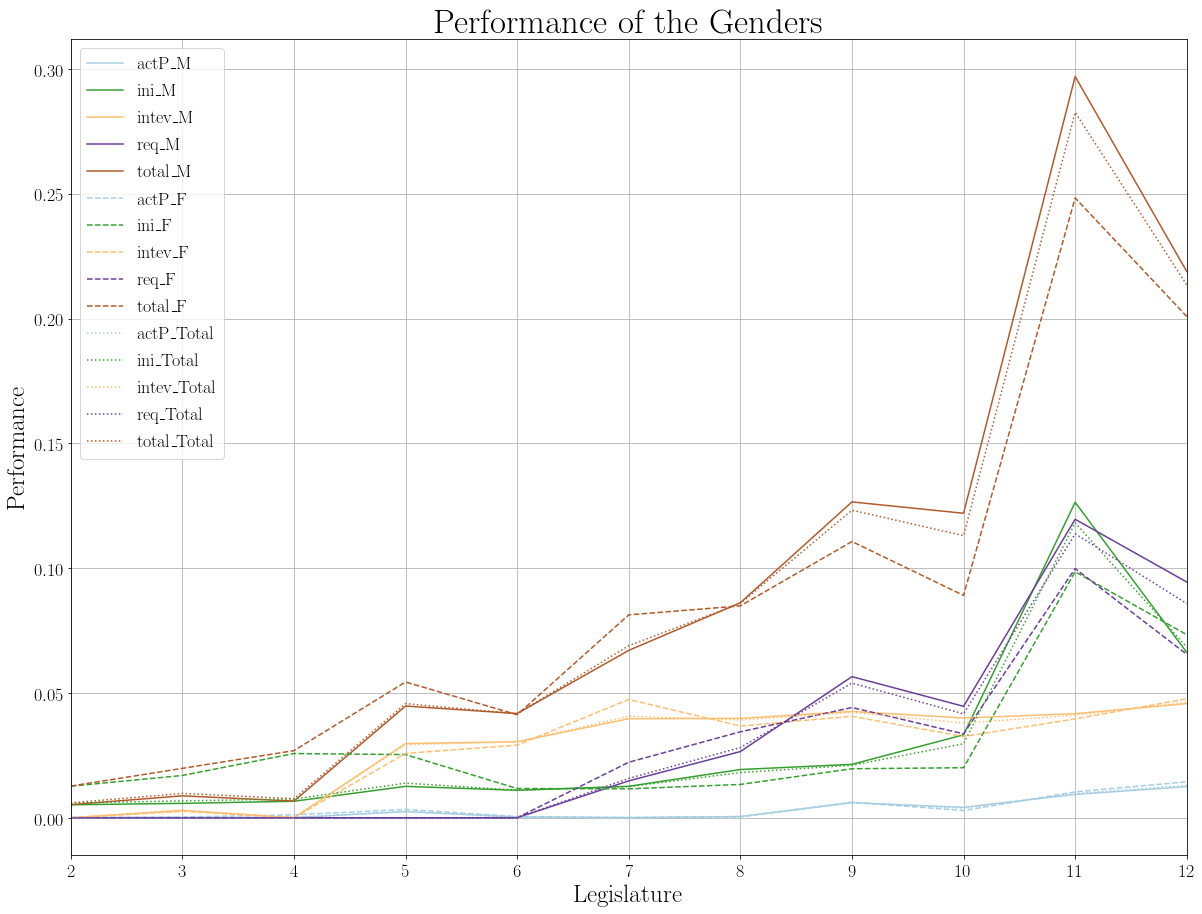

In [361]:
f, ax = plt.subplots(figsize=(20,15))
plot_performance_M.plot(ax=ax, cmap='Paired')
plot_performance_F.plot(ax=ax, cmap='Paired', linestyle="--")
plot_performance_Total.plot(ax=ax, cmap='Paired', linestyle=":")
ax.legend(labels=[i+"\\_M" for i in plot_performance_M.columns]+\
          [i+"\\_F" for i in plot_performance_M.columns]+\
          [i+"\\_Total" for i in plot_performance_M.columns])
ax.set_xticks(np.arange(2, 13, step=1))
ax.set_title("Performance of the Genders", size=35)
ax.set_ylabel("Performance", fontsize=25)
ax.set_xlabel("Legislature", fontsize=25)
ax.grid()
plt.show()